In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# 1. Load Dataset
file_path = "EastWestAirlines.xlsx"
data = pd.read_excel(file_path, sheet_name="data")

print("Shape:", data.shape)
print(data.head())


Shape: (3999, 12)
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [3]:
# 2. Preprocessing

# Drop ID column if present
if 'ID#' in data.columns:
    data = data.drop('ID#', axis=1)

# Handle missing values (if any)
data = data.dropna()

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


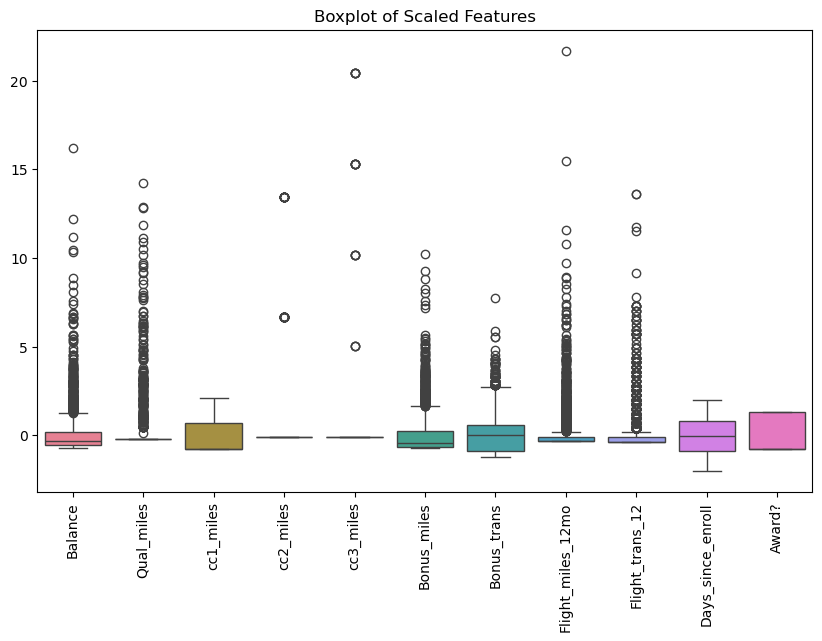

In [4]:
# 3. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.boxplot(data=pd.DataFrame(scaled_data, columns=data.columns))
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features")
plt.show()

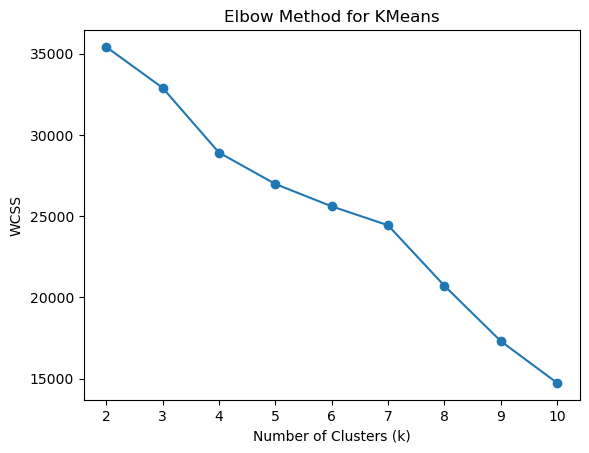

KMeans Silhouette Score: 0.19071186813310886


In [5]:
# 4. K-Means Clustering
# ---------------------------
# Elbow method
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for KMeans")
plt.show()

# Fit KMeans with optimal K (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

print("KMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))


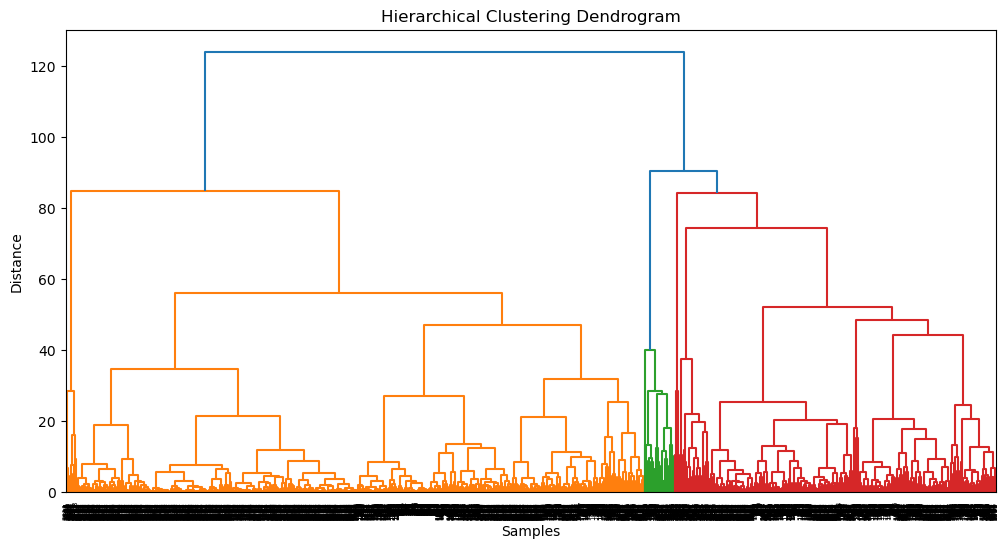

In [6]:
# 5. Hierarchical Clustering
# ---------------------------
linkage_matrix = linkage(scaled_data, method="ward")

plt.figure(figsize=(12,6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Cut into clusters (e.g., 4)
hier_labels = fcluster(linkage_matrix, 4, criterion="maxclust")


In [7]:
# 6. DBSCAN Clustering
# ---------------------------
dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)

# Filter noise for silhouette score (-1 = noise)
mask = db_labels != -1
if len(set(db_labels[mask])) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_data[mask], db_labels[mask]))


DBSCAN Silhouette Score: 0.28053595722860075


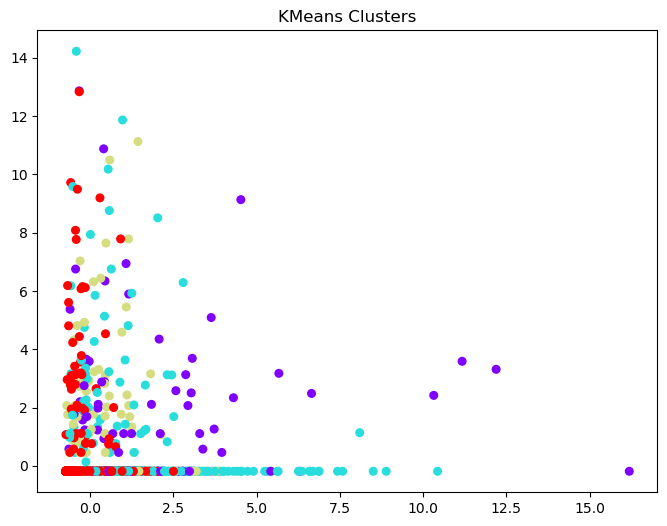

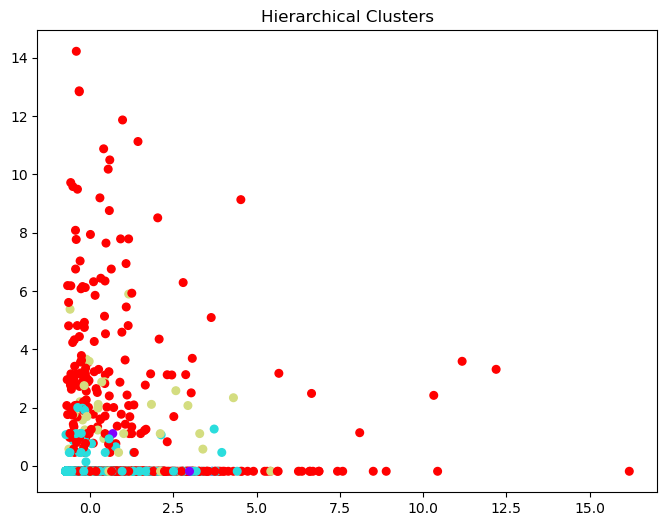

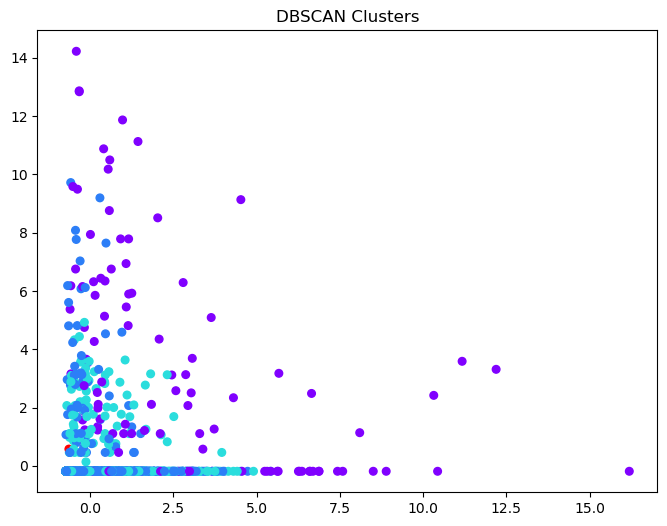

In [8]:
# 7. Visualization
# ---------------------------
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8,6))
    plt.scatter(data[:,0], data[:,1], c=labels, cmap="rainbow", s=30)
    plt.title(title)
    plt.show()

plot_clusters(scaled_data, kmeans_labels, "KMeans Clusters")
plot_clusters(scaled_data, hier_labels, "Hierarchical Clusters")
plot_clusters(scaled_data, db_labels, "DBSCAN Clusters")

In [9]:
# 8. Cluster Analysis
# ---------------------------
data_with_clusters = data.copy()
data_with_clusters["KMeans_Cluster"] = kmeans_labels
data_with_clusters["Hier_Cluster"] = hier_labels
data_with_clusters["DBSCAN_Cluster"] = db_labels

print(data_with_clusters.groupby("KMeans_Cluster").mean())

                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               193291.147436  795.455128   2.179487   1.038462   1.000000   
1               122119.899548  151.724887   3.885068   1.002715   1.043439   
2                59693.586570  112.733010   1.372168   1.031553   1.000809   
3                36920.458056   96.690413   1.269640   1.006658   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               32292.288462    27.628205        5530.230769        16.211538   
1               43772.394570    19.398190         366.520362         1.087783   
2                6311.116505     8.456311         258.830097         0.806634   
3                4897.208389     6.790280         167.861518         0.509321   

                Days_since_enroll    Award? 